In [1]:
%matplotlib widget

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from ipywidgets import interact, widgets

from sklearn.linear_model import Ridge
from sklearn.preprocessing import SplineTransformer

In [3]:
def update_model():
    if plt.gca().lines:
        plt.gca().lines.pop()
        
    x_pol = splines.fit_transform(np.array(x)[:, None])
    ridge.fit(x_pol, np.array(y))
    
    y_draw_line = ridge.predict(splines.fit_transform(x_draw_line))
    
    ax.plot(x_draw_line, y_draw_line, c='black', label='fit')
    plt.gcf().canvas.draw_idle()
    
def onclick(event):
    if event.button == MouseButton.RIGHT:
        ax.vlines([event.xdata], ymin=-5, ymax=5, linestyles="dashed")
        
        splines.knots = np.sort(np.append(splines.knots, event.xdata))[:, None]
    else:
        x.append(event.xdata)
        y.append(event.ydata)
    
    sc.set_offsets(np.c_[x,y])
    
    update_model()

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), FloatSlider(value=0.0, descript…

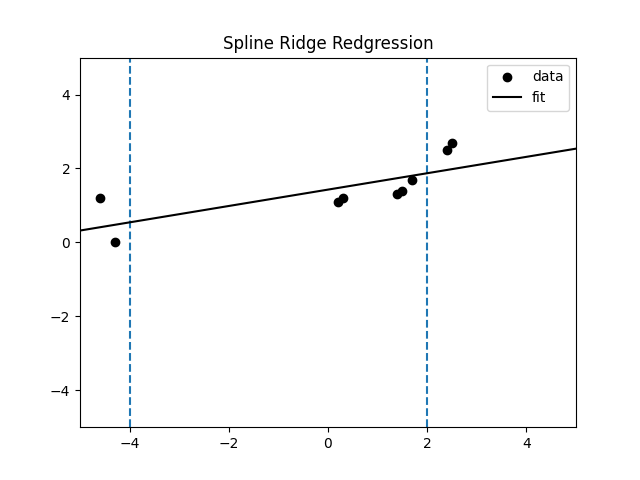

In [4]:
splines = SplineTransformer(degree=1, knots=np.array([-4, 2])[:, None], extrapolation='linear')
ridge = Ridge(0, solver='auto')

x_draw_line = np.linspace(-5, 5, 100)[:, None]

x = [-4.3, -4.6,  0.2, 0.3, 1.4, 1.5, 1.7, 2.4, 2.5]
y = [0.0, 1.2, 1.1, 1.2, 1.3, 1.4, 1.7, 2.5, 2.7]

fig, ax = plt.subplots()

ax.vlines(splines.knots, ymin=-5, ymax=5, linestyles="dashed")

plt.title('Spline Ridge Redgression')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

sc = ax.scatter(x,y, c='black', label='data')

cid = fig.canvas.mpl_connect('button_press_event', onclick)

def interactive_function(degree, alpha):
    splines.degree = degree
    ridge.alpha = alpha
    
    update_model()

interact(interactive_function, 
         degree=widgets.IntSlider(min=1, max=10, step=1, value=1, description='degree'),
         alpha=widgets.FloatSlider(min=0, max=3, step=0.01, value=0, description='regularization')
        );

plt.legend();